In [ ]:
#loading dataset,showing brief view of the dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/RealEstateUnitedStates (1).csv')
data.head()

,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0


In [ ]:
# EDA(EXPLORATORY DATA ANALYSIS), outlier detection using z-score
from scipy.stats import zscore

numerical_columns = [
    'Average Sales Price',
    'Number of Households (Thousands)',
    'Median Income - Current Dollars',
    'Median Income - 2022 Dollars',
    'Mean Income - Current Dollars',
    'Mean Income - 2022 Dollars'
]

# Calculate the Z-scores for the numerical columns
z_scores = data[numerical_columns].apply(zscore)
outliers_zscore = (z_scores > 3) | (z_scores < -3)
outliers_summary_zscore = outliers_zscore.sum()

outliers_summary_zscore


Average Sales Price                 6
Number of Households (Thousands)    0
Median Income - Current Dollars     0
Median Income - 2022 Dollars        0
Mean Income - Current Dollars       0
Mean Income - 2022 Dollars          0
dtype: int64

In [ ]:
#for EDA, outlier detection using IQR(interquartile range)
# Calculate the IQR for the numerical columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))
outliers_summary_iqr = outliers_iqr.sum()

outliers_summary_iqr


Average Sales Price                  15
Number of Households (Thousands)    315
Median Income - Current Dollars       0
Median Income - 2022 Dollars          0
Mean Income - Current Dollars         0
Mean Income - 2022 Dollars            0
dtype: int64

In [ ]:
#Now remove the detected outliers

outliers_zscore = (z_scores > 3) | (z_scores < -3)
outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR)))

# Combine the outliers detected by both methods
combined_outliers = outliers_zscore | outliers_iqr

# Remove rows containing outliers
data_cleaned = data[~combined_outliers.any(axis=1)]

# Display the shape of the original and cleaned dataset
original_shape = data.shape
cleaned_shape = data_cleaned.shape

original_shape, cleaned_shape

((1575, 10), (1246, 10))

In [ ]:
#DATA PREPROCESSING
#checking and removing missing values if any

new_data = data_cleaned.dropna()
new_data.shape

(1246, 10)

In [ ]:
#Performing Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = ['Number of Households (Thousands)', 'Median Income - Current Dollars', 'Median Income - 2022 Dollars', 'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars']
target = 'Average Sales Price'
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Region', 'Home Size'], drop_first=True)
X = data[features + [col for col in data.columns if col.startswith('Region_') or col.startswith('Home Size_')]]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred_linear = linear_regressor.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear

(60951983.30999998, 0.9253188966345479)

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)
y_pred_tree = tree_regressor.predict(X_test)

mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

mse_tree, r2_tree


(36172418.82985197, 0.95567993028428)

In [ ]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
forest_regressor.fit(X_train, y_train)
y_pred_forest = forest_regressor.predict(X_test)

mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)
mse_forest, r2_forest

(36021113.933845505, 0.9558653158281907)

In [ ]:
#Summary of analysis

results = {
    'Model': ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression'],
    'MSE': [mse_linear, mse_tree, mse_forest],
    'Coefficient of Determination': [r2_linear, r2_tree, r2_forest]
}

results_data = pd.DataFrame(results)
results_data

,Model,MSE,Coefficient of Determination
0,Linear Regression,6.095198e+07,0.925319
1,Decision Tree Regression,3.617242e+07,0.955680
2,Random Forest Regression,3.602111e+07,0.955865


In [ ]:
features = ['Number of Households (Thousands)', 'Median Income - Current Dollars', 'Median Income - 2022 Dollars', 'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars']
# One-hot encode categorical variables in the original data for reference
data_encoded = pd.get_dummies(data, columns=['Region', 'Home Size'], drop_first=True)
# Extract relevant columns
X = data_encoded[features + [col for col in data_encoded.columns if col.startswith('Region_') or col.startswith('Home Size_')]]
# Fit the scaler on the original data
scaler = StandardScaler()
scaler.fit(X)
# Train the model
forest_regressor = RandomForestRegressor()
forest_regressor.fit(X, data_encoded['Average Sales Price'])

def predict_sales_price(input_features):
    # Extracting input features
    num_households = input_features['Number of Households (Thousands)']
    median_income_current = input_features['Median Income - Current Dollars']
    median_income_2022 = input_features['Median Income - 2022 Dollars']
    mean_income_current = input_features['Mean Income - Current Dollars']
    mean_income_2022 = input_features['Mean Income - 2022 Dollars']
    region = input_features['Region']
    home_size = input_features['Home Size']

    # Creating a DataFrame for the input features
    input_df = pd.DataFrame([[num_households, median_income_current, median_income_2022, mean_income_current, mean_income_2022]],
                            columns=['Number of Households (Thousands)', 'Median Income - Current Dollars', 'Median Income - 2022 Dollars',
                                     'Mean Income - Current Dollars', 'Mean Income - 2022 Dollars'])

    # Adding one-hot encoded columns for Region and Home Size
    region_columns = [col for col in X.columns if col.startswith('Region_')]
    home_size_columns = [col for col in X.columns if col.startswith('Home Size_')]

    for col in region_columns:
        input_df[col] = 0
    for col in home_size_columns:
        input_df[col] = 0

    region_column = 'Region_' + region
    home_size_column = 'Home Size_' + home_size

    if region_column in input_df.columns:
        input_df.at[0, region_column] = 1
    if home_size_column in input_df.columns:
        input_df.at[0, home_size_column] = 1

    input_scaled = scaler.transform(input_df)

    predicted_price = forest_regressor.predict(input_scaled)

    return predicted_price[0]

input_features = {
    'Number of Households (Thousands)': 28280.0,
    'Median Income - Current Dollars': 73070.0,
    'Median Income - 2022 Dollars': 73070.0,
    'Mean Income - Current Dollars': 102400.0,
    'Mean Income - 2022 Dollars': 102400.0,
    'Region': 'Midwest',
    'Home Size': 'Double'
}

predicted_price = predict_sales_price(input_features)
print(f"Predicted Average Sales Price: ${predicted_price:.2f}")

Predicted Average Sales Price: $79807.05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


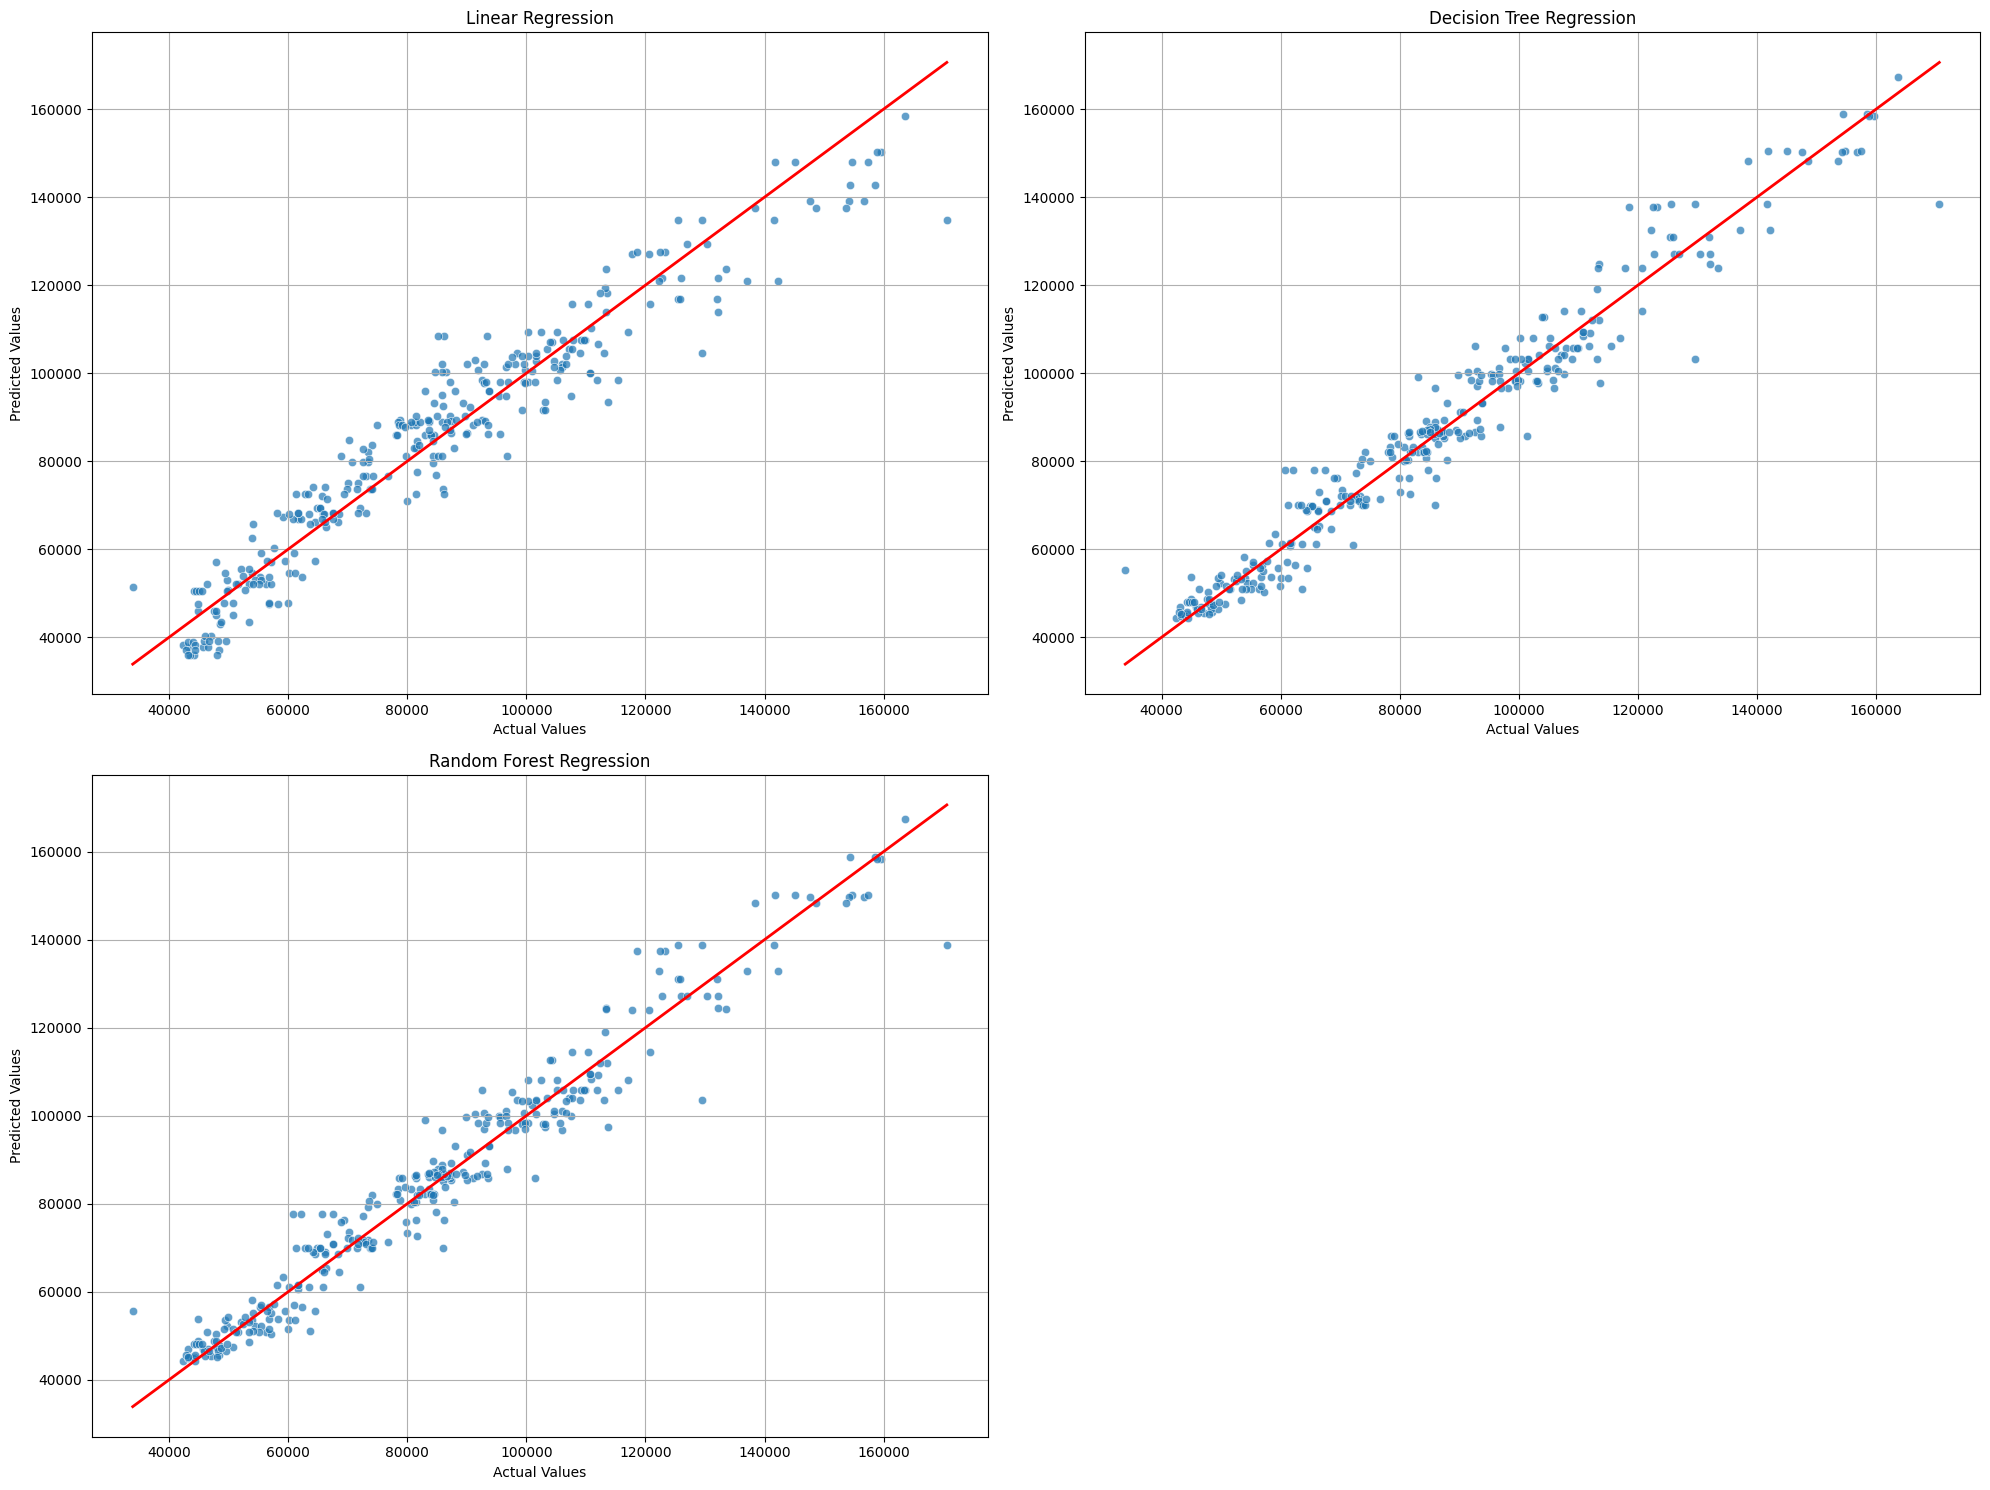

In [ ]:
# Plotting the results
plt.figure(figsize=(20, 15))

# Linear Regression
plt.subplot(221)
plt.scatter(y_test, y_pred_linear, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression')
plt.grid(True)

# Decision Tree Regression
plt.subplot(222)
plt.scatter(y_test, y_pred_tree, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regression')
plt.grid(True)

# Random Forest Regression
plt.subplot(223)
plt.scatter(y_test, y_pred_forest, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.grid(True)

plt.tight_layout()
plt.show()

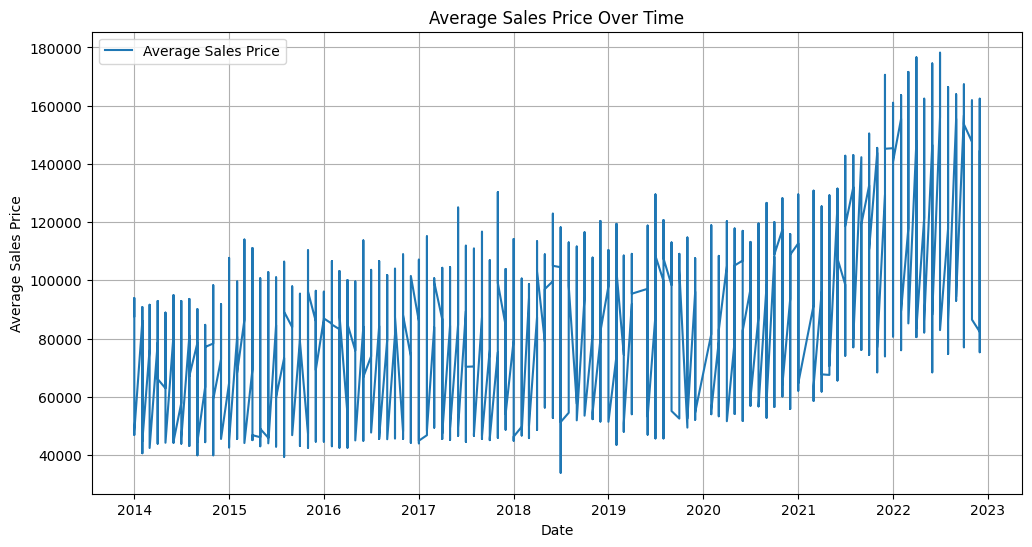

In [ ]:
#time-series plot
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'], format='%Y-%B')
data.set_index('Date', inplace=True)
data.sort_index(inplace=True)

# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(data['Average Sales Price'], label='Average Sales Price')
plt.title('Average Sales Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales Price')
plt.legend()
plt.grid(True)
plt.show()

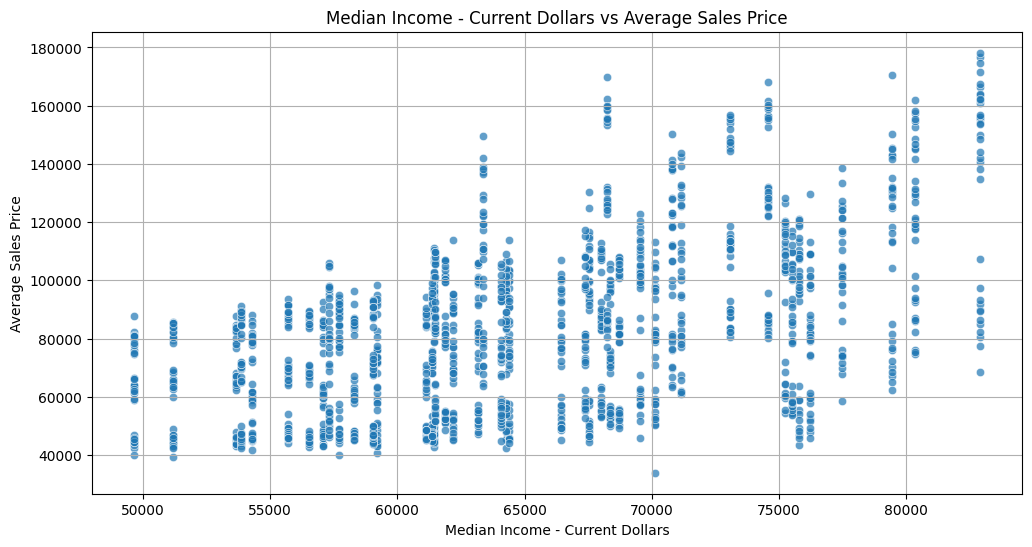

In [ ]:
#scatterplot
plt.figure(figsize=(12, 6))
plt.scatter(data['Median Income - Current Dollars'], data['Average Sales Price'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Median Income - Current Dollars vs Average Sales Price')
plt.xlabel('Median Income - Current Dollars')
plt.ylabel('Average Sales Price')
plt.grid(True)
plt.show()

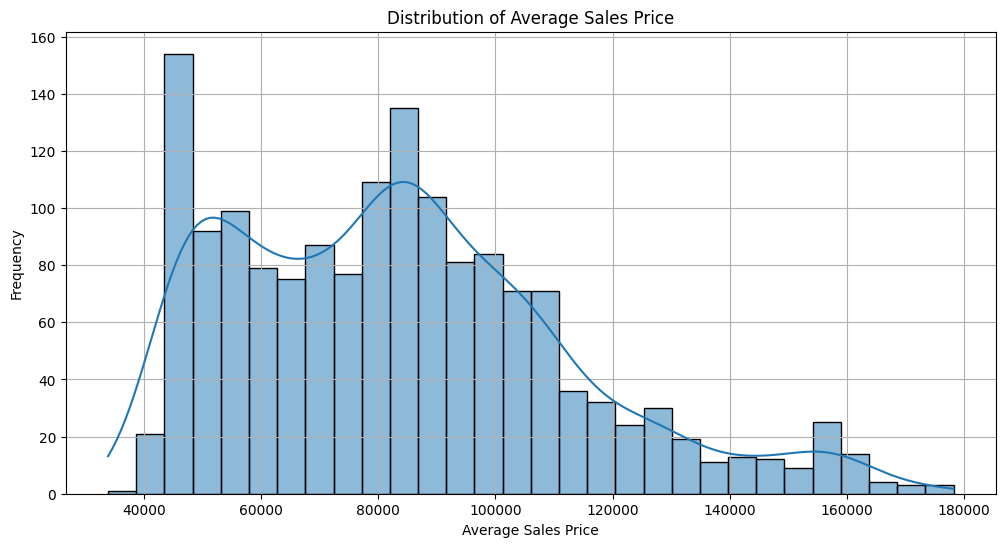

In [ ]:
# Histogram: Distribution of Average Sales Price
plt.figure(figsize=(12, 6))
sns.histplot(data['Average Sales Price'], bins=30, kde=True)
plt.title('Distribution of Average Sales Price')
plt.xlabel('Average Sales Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
#Categorical variables like 'Region' and 'Home Size' are converted into numerical format using one-hot encoding.
#This creates new columns for each category with binary values (0 or 1), which can be used in the regression model.
#features is a list of columns from the dataset that are used as predictor variables.
#target is the column representing the outcome we want to predict, which is the "Average Sales Price"